<H2> IBM Applied Data Science Capstone </H2>

<H1>Best Stationary Shop Locations</H1>

<p>Project by: <b>PRASFUR TIWARI</b></p>

<H2>Introduction</H2>

<p>Seeing the current scenario of India, there are numerous schools; nearly one in every street, incrementing the number of students. As we all would be familiar with the fact that there is a lot of homework and project work allotted to the students during school. To gain utter perfection in their work, the students require several stationary stuffs like pen, pencils, charts, project files, etc. This makes the business of a stationary shop much favorable to flourish and prosper.
    
Taking the school students as the target audience, this project aims to find the schools around a given location so that a business person, aiming to start a stationary shop, can receive help to pursue a profitable business.
</p>

<H2>Business Problem </H2>
<p> For a business person to run a stationary shop business, it will be utterly problematic for his business to acquire profits if he sets his shop in a location where no students or schools are present. Hence, this project aims to colect data about a particular location where many schools are located, so that his shop can attract more and more students. </p>

<p>This idea can solve the problems faced by students and make the business profitable as students need a lot of stationary stuff to complete their homework as well as projects.
 </p>

<H2>Data</H2>
<p>The data used will be the location of schools that will be acquired using the <b>Foursquare</b> website. Through the website, coordinates of schools in a particular location will be generated and processed. Then based on clustering, the business person will be delivered with the best location for his shop to be set up.</p>

<h3>Importing libraries</h3>

In [ ]:
import requests as rq
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

<h3>Foursquare Credentials</h3>

In [ ]:
ID='NBNLCAUTQES0AHXHV15IHEXDFKIWENRUTYNLVGYCFAIQRZLU'
SECRET='KLMR4EK2L4QQMYP2EG1RMPBDTF5LBGFVSBK3WHNSWF0TK0CY'
Version='20180604'
Limit=120

<h3> Getting Coordinates </h3>
<p> This project aims to find the schools in <b>Kanpur</b>, Uttar Pradesh.</p>

In [81]:
address='Kanpur, Uttar Pradesh'
geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print(latitude,longitude)

26.4609135 80.3217588


<h2>Data Gathering</h2>
<p>The data regarding schools of Kanpur is acquired from the Foursquare website by sending the request.</p> 

In [82]:
searching='Schools'
radius=3000
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(ID,SECRET,Version,latitude,longitude,radius,Limit)
results=rq.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5eb2a4970de0d9001b1ea7ee'}, 'response': {'venues': [{'id': '4c53c90ab3b09c74cc1b1eb4', 'name': 'Gumti No. 5', 'location': {'address': 'Gumti', 'lat': 26.467595541007164, 'lng': 80.31269020223081, 'labeledLatLngs': [{'label': 'display', 'lat': 26.467595541007164, 'lng': 80.31269020223081}], 'distance': 1170, 'cc': 'IN', 'city': 'Kānpur', 'state': 'Uttar Pradesh', 'country': 'India', 'formattedAddress': ['Gumti', 'Kānpur', 'Uttar Pradesh', 'India']}, 'categories': [{'id': '4bf58dd8d48988d12b951735', 'name': 'Bus Line', 'pluralName': 'Bus Lines', 'shortName': 'Bus', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1588765865', 'hasPerk': False}, {'id': '501ff6e3f470fc90bfb4f394', 'name': 'Fastrack Store', 'location': {'address': 'Ground Floor ,Next To Wot, Z Square Mall', 'lat': 26.463888, 'lng': 80.33289, 'labeledLatLngs': [{'label': 'display', 'lat': 26.463888, 'lng

<H1>Data Preprocessing and Wrangling</H1>

<H2>Data Normalization</H2>
<p>The collected data is normlized to make it suitable for model fitting. </p>

In [83]:
venues=results['response']['venues']
df=json_normalize(venues)
df.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,4c53c90ab3b09c74cc1b1eb4,Gumti,IN,Kānpur,India,NaN,1170,"[Gumti, Kānpur, Uttar Pradesh, India]","[{'label': 'display', 'lat': 26.46759554100716...",26.467596,80.312690,NaN,Uttar Pradesh,Gumti No. 5,v-1588765865
1,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",False,501ff6e3f470fc90bfb4f394,"Ground Floor ,Next To Wot, Z Square Mall",IN,Kānpur,India,NaN,1157,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...","[{'label': 'display', 'lat': 26.463888, 'lng':...",26.463888,80.332890,208001,Uttar Pradesh,Fastrack Store,v-1588765865
2,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,5303a0cb11d2eac30b61e9c6,"110 / 189, R. K. Nagar G. T. Road",IN,Kānpur,India,NaN,924,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...","[{'label': 'display', 'lat': 26.468362, 'lng':...",26.468362,80.317648,NaN,Uttar Pradesh,HDFC Bank,v-1588765865
3,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",False,4e4287276365c15e6fa844e6,"Z-square Mall - Property NO 16/113, The Mall",IN,Kānpur,India,MG Road,330,"[Z-square Mall - Property NO 16/113, The Mall ...","[{'label': 'display', 'lat': 26.45847126867119...",26.458471,80.319865,208001,Uttar Pradesh,Reliance Digital,v-1588765865
4,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4d03a0217ee8a090cd99f054,112/370,IN,Kanpur,India,Swaroop Nagar,653,"[112/370 (Swaroop Nagar), Kanpur 208002, Uttta...","[{'label': 'display', 'lat': 26.46402286603909...",26.464023,80.316195,208002,Utttar Pradesh,Futureistic,v-1588765865


<H2>Data Filtering</H2>
<p>We filter the data by arranging it in a more readable format.</p>

In [191]:
filter=['name','categories']+[col for col in df.columns if col.startswith('location')]+['id']
df_filter=df.loc[:,filter]
def category(row):
    try:
        category_list=row['categories']
    except:
        category_list=row['venue.categories']
    if len(category_list)==0:
        return None
    else:
        return category_list[0]['name']
df_filter['categories']=df_filter.apply(category,axis=1)
df_filter.columns=[column.split('.')[-1] for column in df_filter.columns]
df_names=df_filter['name']
df_filter

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Gumti No. 5,Bus Line,Gumti,IN,Kānpur,India,NaN,1170,"[Gumti, Kānpur, Uttar Pradesh, India]","[{'label': 'display', 'lat': 26.46759554100716...",26.467596,80.312690,NaN,Uttar Pradesh,4c53c90ab3b09c74cc1b1eb4
1,Fastrack Store,Clothing Store,"Ground Floor ,Next To Wot, Z Square Mall",IN,Kānpur,India,NaN,1157,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...","[{'label': 'display', 'lat': 26.463888, 'lng':...",26.463888,80.332890,208001,Uttar Pradesh,501ff6e3f470fc90bfb4f394
2,HDFC Bank,Bank,"110 / 189, R. K. Nagar G. T. Road",IN,Kānpur,India,NaN,924,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...","[{'label': 'display', 'lat': 26.468362, 'lng':...",26.468362,80.317648,NaN,Uttar Pradesh,5303a0cb11d2eac30b61e9c6
3,Reliance Digital,Electronics Store,"Z-square Mall - Property NO 16/113, The Mall",IN,Kānpur,India,MG Road,330,"[Z-square Mall - Property NO 16/113, The Mall ...","[{'label': 'display', 'lat': 26.45847126867119...",26.458471,80.319865,208001,Uttar Pradesh,4e4287276365c15e6fa844e6
4,Futureistic,Office,112/370,IN,Kanpur,India,Swaroop Nagar,653,"[112/370 (Swaroop Nagar), Kanpur 208002, Uttta...","[{'label': 'display', 'lat': 26.46402286603909...",26.464023,80.316195,208002,Utttar Pradesh,4d03a0217ee8a090cd99f054
5,Maruti Showroom,Automotive Shop,NaN,IN,NaN,India,NaN,1521,[India],"[{'label': 'display', 'lat': 26.45305252075195...",26.453053,80.309273,NaN,NaN,4f20036ae4b0fa52e4b77982
6,Ghadi Detergent,Laundry Service,NaN,IN,NaN,India,NaN,625,[India],"[{'label': 'display', 'lat': 26.466276, 'lng':...",26.466276,80.319891,NaN,NaN,51823876498e8e40624a2ade
7,Raaj Ratan,Boutique,P. Road,IN,Kānpur,India,NaN,1191,"[P. Road, Kānpur, Uttar Pradesh, India]","[{'label': 'display', 'lat': 26.46419071116898...",26.464191,80.333145,NaN,Uttar Pradesh,4eb3beda29c212fb6ba4d619
8,sikka dental clinic ashok nagar,Dentist's Office,"111A/22,ASHOK NAGAR",IN,Kānpur,India,"ASHOK NAGAR,near moti jheel",1493,"[111A/22,ASHOK NAGAR (ASHOK NAGAR,near moti jh...","[{'label': 'display', 'lat': 26.47254314840256...",26.472543,80.314290,208025,Uttar Pradesh,4ef6c1186c25c411eac4f299
9,Shree Raghunath Mandir,None,"Kaushalpuri, Gumti No. 5",IN,Kānpur,India,NaN,1213,"[Kaushalpuri, Gumti No. 5, Kānpur 208013, Utta...","[{'label': 'display', 'lat': 26.4684805367142,...",26.468481,80.312990,208013,Uttar Pradesh,53f0c31f498ee7207e633881


<H2>Checking for null values</H2>
</P>Here, we check for any Null, None or NaN values which are to be removed as they are unusable.<P>

In [105]:
df_filter.isnull().sum()

name                  0
categories            8
address              67
cc                    0
city                 54
country               0
crossStreet         101
distance              0
formattedAddress      0
labeledLatLngs        0
lat                   0
lng                   0
postalCode           87
state                53
id                    0
dtype: int64

<H3>Null values using Heatmap</H3>
<P>Here, we generate a heatmap so as to get information regarding null values, graphically.</P>

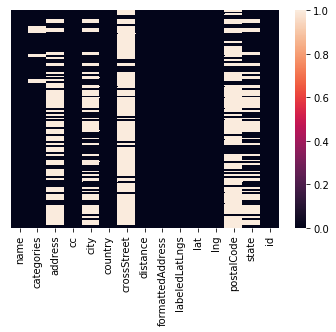

In [106]:
import seaborn as sns
sns.heatmap(df_filter.isnull(),yticklabels=False)

<H2>Data Cleaning</H2>
<p>Here, we remove the unwanted or unusable rows having null values.</p>

In [107]:
df_filter.drop(columns={'categories','address','city','crossStreet','postalCode','state'},inplace=True)
df_filter.head()

,name,cc,country,distance,formattedAddress,labeledLatLngs,lat,lng,id
0,Gumti No. 5,IN,India,1170,"[Gumti, Kānpur, Uttar Pradesh, India]","[{'label': 'display', 'lat': 26.46759554100716...",26.467596,80.312690,4c53c90ab3b09c74cc1b1eb4
1,Fastrack Store,IN,India,1157,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...","[{'label': 'display', 'lat': 26.463888, 'lng':...",26.463888,80.332890,501ff6e3f470fc90bfb4f394
2,HDFC Bank,IN,India,924,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...","[{'label': 'display', 'lat': 26.468362, 'lng':...",26.468362,80.317648,5303a0cb11d2eac30b61e9c6
3,Reliance Digital,IN,India,330,"[Z-square Mall - Property NO 16/113, The Mall ...","[{'label': 'display', 'lat': 26.45847126867119...",26.458471,80.319865,4e4287276365c15e6fa844e6
4,Futureistic,IN,India,653,"[112/370 (Swaroop Nagar), Kanpur 208002, Uttta...","[{'label': 'display', 'lat': 26.46402286603909...",26.464023,80.316195,4d03a0217ee8a090cd99f054


<H4>Ensuring the removal of null values</H4>

In [108]:
df_filter.isnull().sum()

name                0
cc                  0
country             0
distance            0
formattedAddress    0
labeledLatLngs      0
lat                 0
lng                 0
id                  0
dtype: int64

<h4>Heatmap to ensure cleaned data</h4>

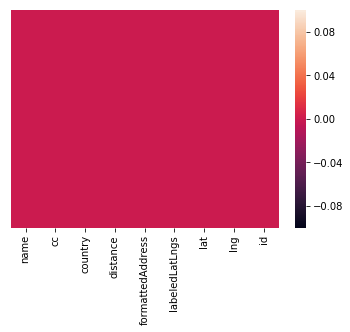

In [109]:
sns.heatmap(df_filter.isnull(),yticklabels=False)

<H4>Removing remaining unusable columns</H4> 

In [111]:
df_filter.drop(columns={'name','cc','country','formattedAddress','labeledLatLngs','id'},inplace=True)

<H2>Data Preprocessing and Standardization</H2>
<p>We start the use of scikit-learn module so as to fit the model.</p>

In [112]:
from sklearn.preprocessing import StandardScaler
Clus_dataset=StandardScaler().fit_transform(df_filter)
Clus_dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-2.39196794e-01,  1.82301382e-01, -6.03723211e-01],
       [-2.72277201e-01, -3.76136025e-01,  1.85980092e+00],
       [-8.65179892e-01,  2.97747002e-01,  9.19201178e-04],
       [-2.37670006e+00, -1.19201517e+00,  2.71269279e-01],
       [-1.55477916e+00, -3.55822226e-01, -1.76226059e-01],
       [ 6.53974212e-01, -2.00819806e+00, -1.02050641e+00],
       [-1.62602927e+00, -1.64505825e-02,  2.74470684e-01],
       [-1.85759212e-01, -3.30541050e-01,  1.89089637e+00],
       [ 5.82724104e-01,  9.27520123e-01, -4.08643364e-01],
       [-1.29776984e-01,  3.15601245e-01, -5.67160913e-01],
       [ 4.32589946e-01,  9.77224579e-01, -1.50533202e-01],
       [ 7.25224321e-01, -2.01264454e+00, -1.06023615e+00],
       [-1.12473386e+00,  7.91224833e-02, -8.66472564e-02],
       [ 1.91357435e+00,  1.90322737e+00,  4.59358801e-01],
       [-2.61589685e+00, -1.11102098e+00,  3.73378509e-01],
       [ 8.62635245e-01, -2.07635766e+00, -1.10011637e+00],
       [ 2.85000435e-01,  9.98591375e-01

<H1>Clustering</H1>

<H3>Applying K-Means Clustering</H3>
<p>We start with the clustering process of our dataset using the k-means algorithm. Since we aim to make 4 clusters, we take 'k' as 4.</p>

In [113]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k, random_state=0).fit(Clus_dataset)

<h4>Getting the labels for each row generated

In [114]:
kmeans.labels_

array([1, 2, 0, 0, 0, 3, 0, 2, 1, 1, 1, 3, 0, 1, 0, 3, 1, 3, 1, 0, 1, 1,
       3, 0, 1, 3, 0, 0, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 0, 3, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 3, 2, 1, 3, 3, 1, 0, 3, 2, 3, 1, 1, 2, 1, 3,
       1, 0, 1, 0, 0, 1, 1, 3, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 3, 0, 3, 1,
       2, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 0,
       3, 1, 1, 1, 1, 2, 3, 3, 1], dtype=int32)

In [115]:
labels=kmeans.labels_
df_filter['Labels']=labels
df_filter.head()

,distance,lat,lng,Labels
0,1170,26.467596,80.312690,1
1,1157,26.463888,80.332890,2
2,924,26.468362,80.317648,0
3,330,26.458471,80.319865,0
4,653,26.464023,80.316195,0


In [141]:
y=0
ColorCode=[]
for x in df_filter['Labels']:
    if x==0:
        ColorCode.append('Red')
    elif x==1:
        ColorCode.append('Yellow')
    elif x==2:
        ColorCode.append('Blue')
    elif x==3:
        ColorCode.append('Green')

In [210]:
%matplotlib inline
knpmap=folium.Map(location=[df_filter['lat'].mean(), df_filter['lng'].mean()], zoom_start=14)
i=0
Kanpur=folium.map.FeatureGroup()
for lat, lon in zip(df_filter['lat'], df_filter['lng']):
    Kanpur.add_child(folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color=ColorCode[i],
        fill=True,
        fill_color=ColorCode[i],
        fill_opacity=0.7))
    i=i+1
knpmap.add_child(Kanpur)
knpmap

In [184]:
cluster1=df_filter.loc[df_filter['Labels']==0,df_filter.columns[[1]+[2]+list(range(5, df_filter.shape[1]))]]
cluster1

,lat,lng
2,26.468362,80.317648
3,26.458471,80.319865
4,26.464023,80.316195
6,26.466276,80.319891
12,26.466911,80.316930
14,26.459009,80.320702
19,26.462986,80.319736
23,26.466150,80.313411
26,26.457633,80.314279
27,26.465788,80.324751


In [185]:
cluster2=df_filter.loc[df_filter['Labels']==1,df_filter.columns[[1]+[2]+list(range(5, df_filter.shape[1]))]]
cluster2

,lat,lng
0,26.467596,80.312690
8,26.472543,80.314290
9,26.468481,80.312990
10,26.472873,80.316406
13,26.479021,80.321407
16,26.473015,80.318939
18,26.477334,80.314994
20,26.471400,80.320400
21,26.471900,80.315300
24,26.470043,80.319632


In [186]:
cluster3=df_filter.loc[df_filter['Labels']==2,df_filter.columns[[1]+[2]+list(range(5, df_filter.shape[1]))]]
cluster3

,lat,lng
1,26.463888,80.332890
7,26.464191,80.333145
29,26.463037,80.338916
30,26.464782,80.340014
34,26.468386,80.329468
40,26.466548,80.335422
44,26.461877,80.339112
48,26.467567,80.330740
52,26.463239,80.338780
59,26.449923,80.331871


In [187]:
cluster4=df_filter.loc[df_filter['Labels']==3,df_filter.columns[[1]+[2]+list(range(5, df_filter.shape[1]))]]
cluster4

,lat,lng
5,26.453053,80.309273
11,26.453023,80.308947
15,26.452600,80.308620
17,26.451347,80.309307
22,26.449311,80.308238
25,26.463246,80.308691
28,26.451347,80.309307
37,26.461539,80.308250
39,26.466810,80.307260
51,26.464351,80.311296


In [188]:
print('Total schools in:\n')
print("Cluster 1:",cluster1.shape[0])
print("Cluster 2:",cluster2.shape[0])
print("Cluster 3:",cluster3.shape[0])
print("Cluster 4:",cluster4.shape[0])

Total schools in:

Cluster 1: 25
Cluster 2: 51
Cluster 3: 16
Cluster 4: 27


<h2>Hence, cluster 2, marked with Yellow, have most number of schools and hence, the nearby areas qualify to become best for the stationery shop</h2>

In [189]:
C1=cluster2['lat'].mean()
C2=cluster2['lng'].mean()
print("The center of the area has coordinates:",C1,C2)

The center of the area has coordinates: 26.471972852432604 80.31585192546214


In [199]:
index=cluster2.index

In [205]:
shop=folium.Map(location=[C1, C2], zoom_start=16)
i=0
mark=folium.map.FeatureGroup()
for lat, lon in zip(cluster2['lat'], cluster2['lng']):
    mark.add_child(folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7))
    i=i+1
for lat, lng, J in zip(cluster2['lat'], cluster2['lng'], index):
    folium.Marker([lat,lng],popup=df_names[J]).add_to(shop)
shop.add_child(mark)
shop